In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Data Overview

In [2]:
data=pd.read_csv('airlines_flights_data.csv')
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df=data.copy()
data.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [5]:
data.shape

(300153, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
data.isnull().sum()/data.shape[0]*100

index               0.0
airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

In [9]:
data.drop(['index'],axis=1,inplace=True)

In [10]:
df.drop(['index'],axis=1,inplace=True)


# Data Visulization

In [11]:
def numerical_columns_analysis(df, column_name):
    # Histogram
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=column_name, kde=True, color='red', bins=30)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    mean = df[column_name].mean()
    median = df[column_name].median()
    plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot + outlier count
    plt.figure(figsize=(10,8))
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outlier_count = outliers.shape[0]  # ✅ Correct count

    sns.boxplot(data=df, x=column_name, color='blue', label=f'Outliers: {outlier_count}')
    plt.xlabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()


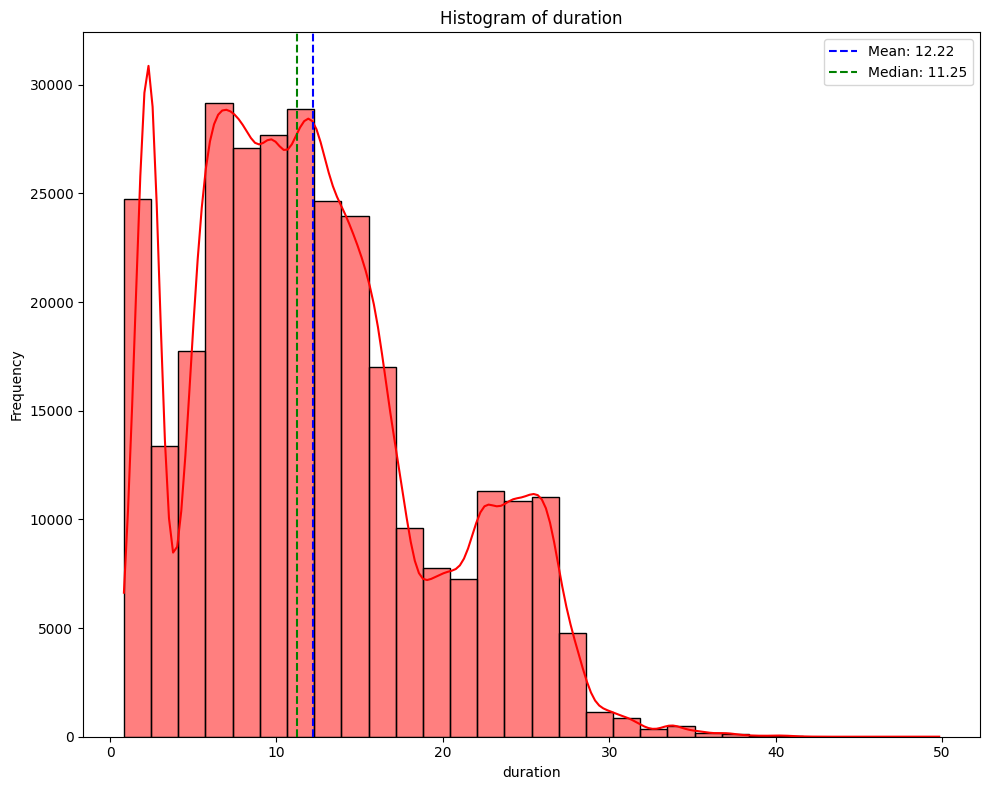

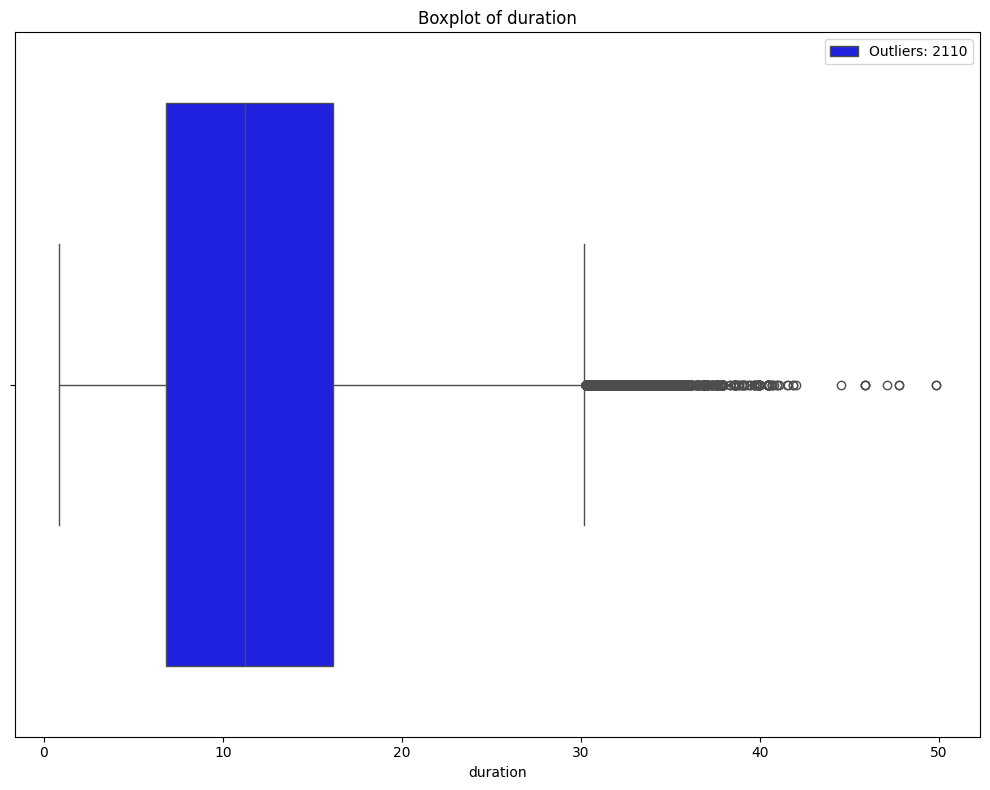

In [12]:
numerical_columns_analysis(data,'duration')

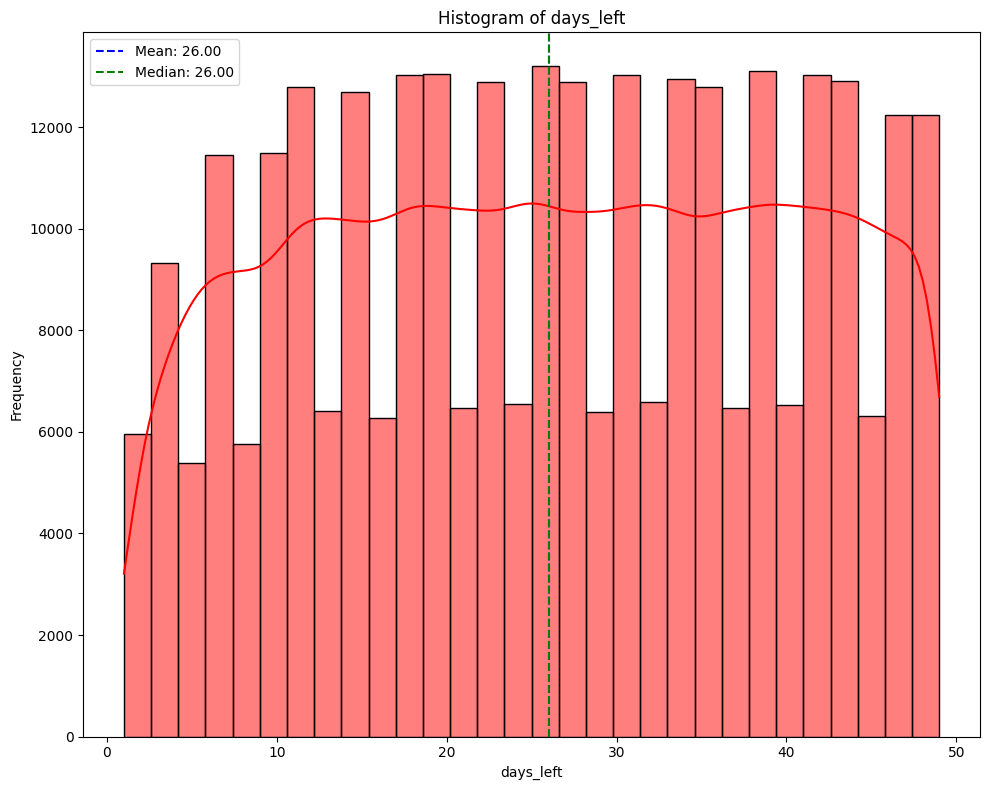

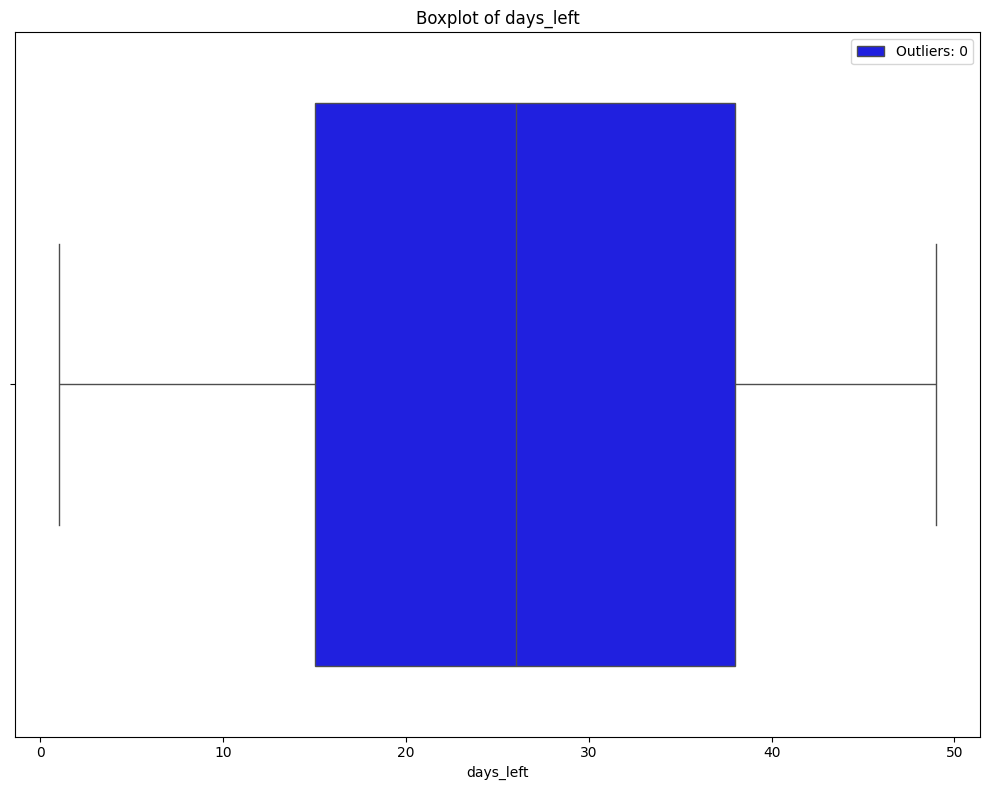

In [13]:
numerical_columns_analysis(data,'days_left')

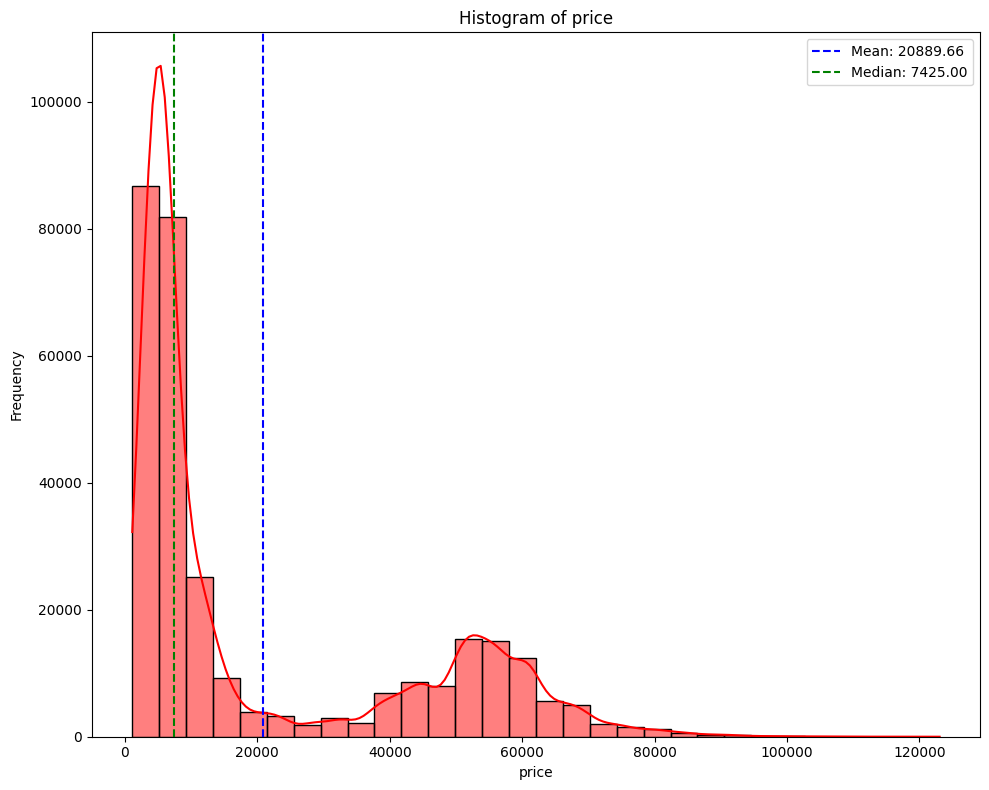

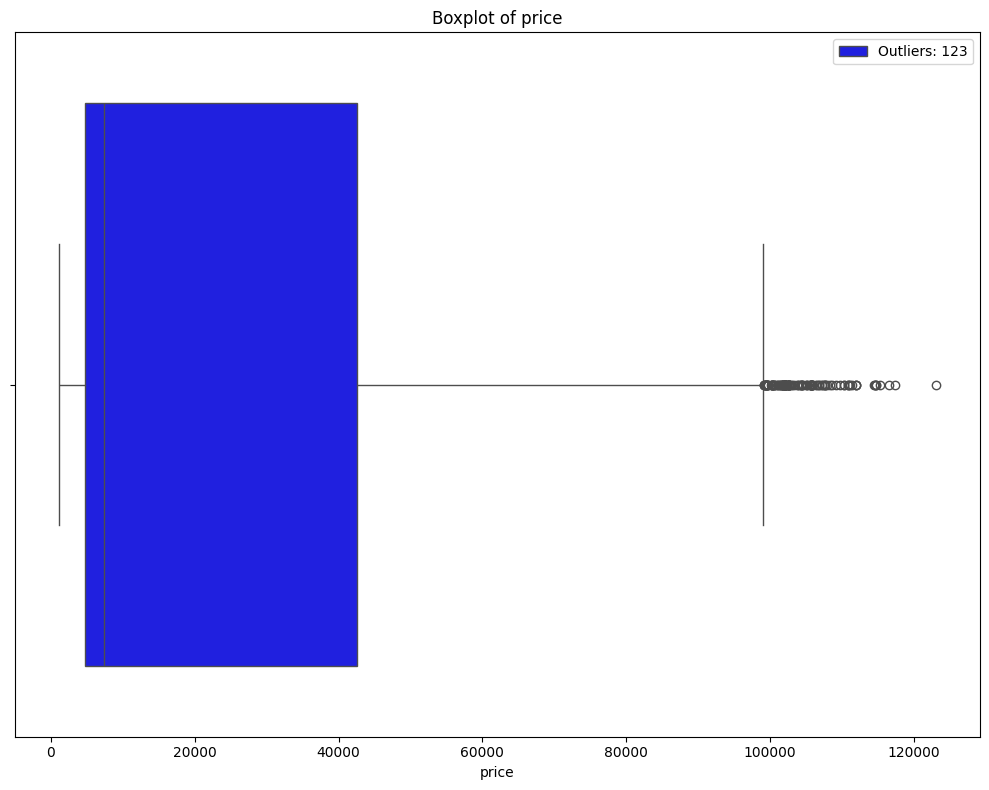

In [14]:
numerical_columns_analysis(data,'price')

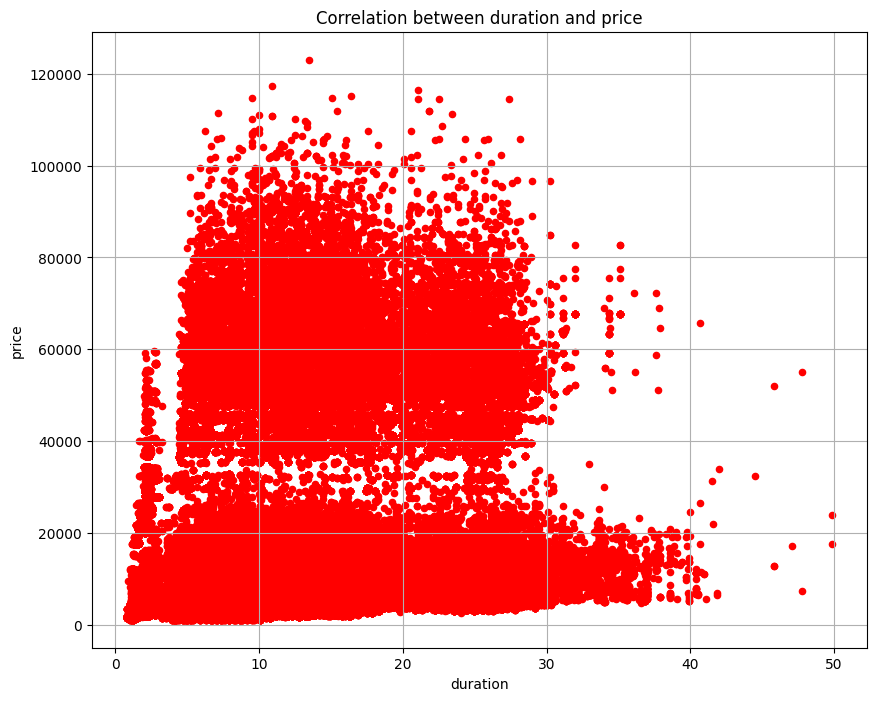

The correlation between duration and price is 0.20422236784542708


In [15]:
def corrlection_between_numerical_columns(df, column1, column2):
    df[[column1, column2]].plot(kind='scatter', x=column1, y=column2, figsize=(10, 8), color='red')
    plt.lineStyles = 'dashed'
    plt.grid(True)
    plt.title(f'Correlation between {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()
    print(f'The correlation between {column1} and {column2} is {df[column1].corr(df[column2])}')


corrlection_between_numerical_columns(data,'duration','price')



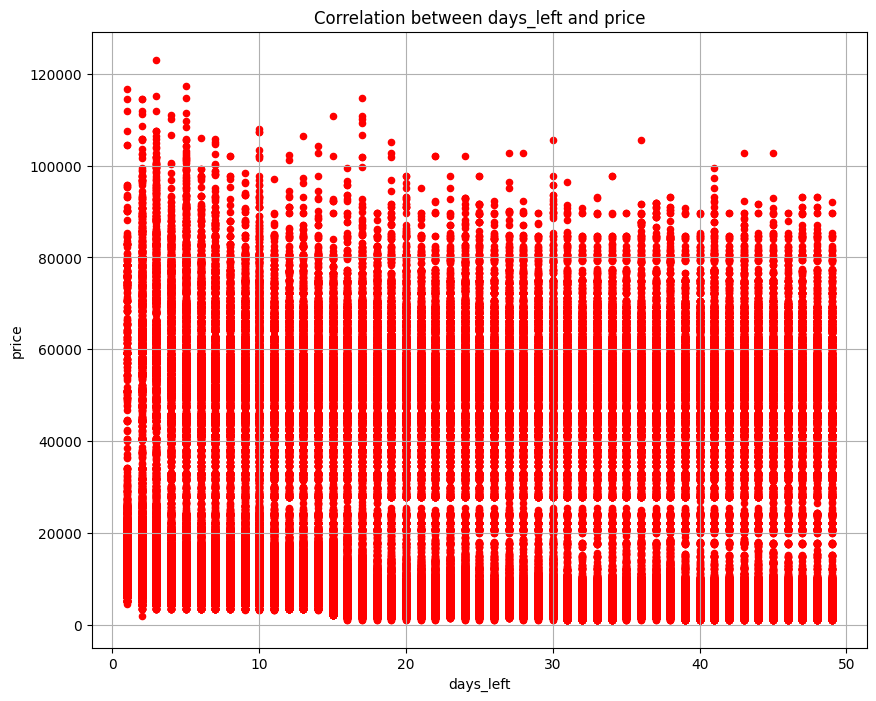

The correlation between days_left and price is -0.09194853217143828


In [16]:
corrlection_between_numerical_columns(data,'days_left','price')

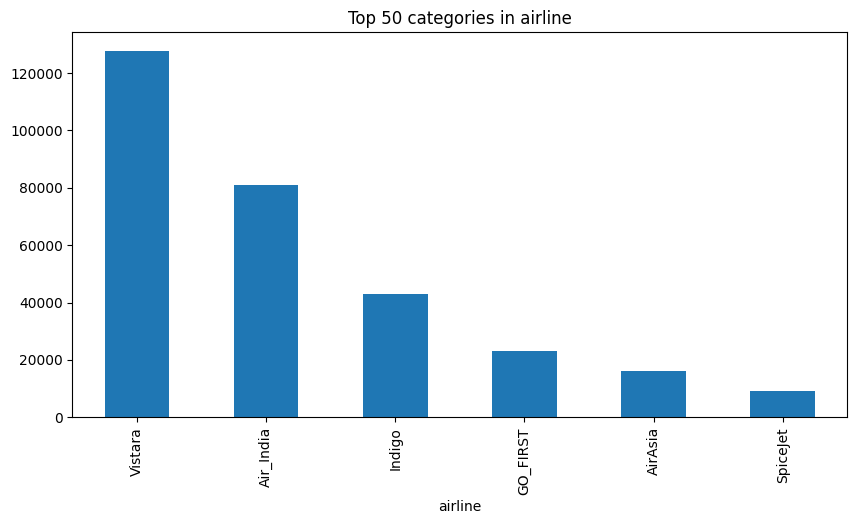

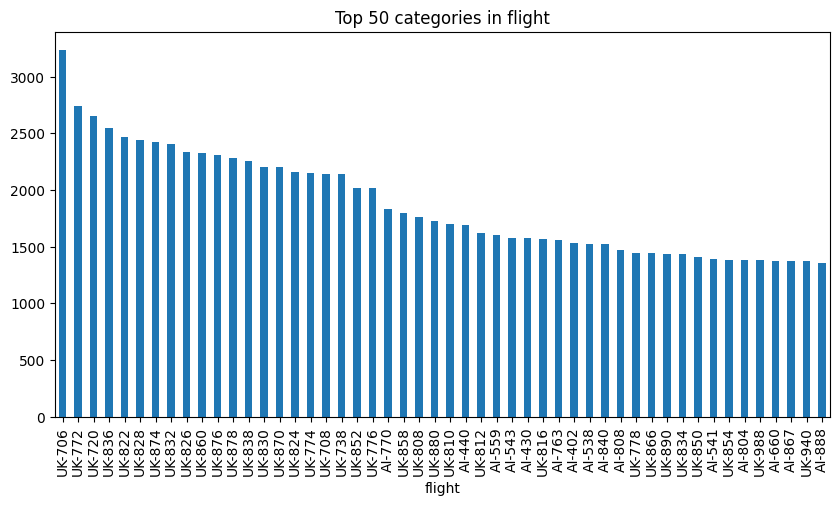

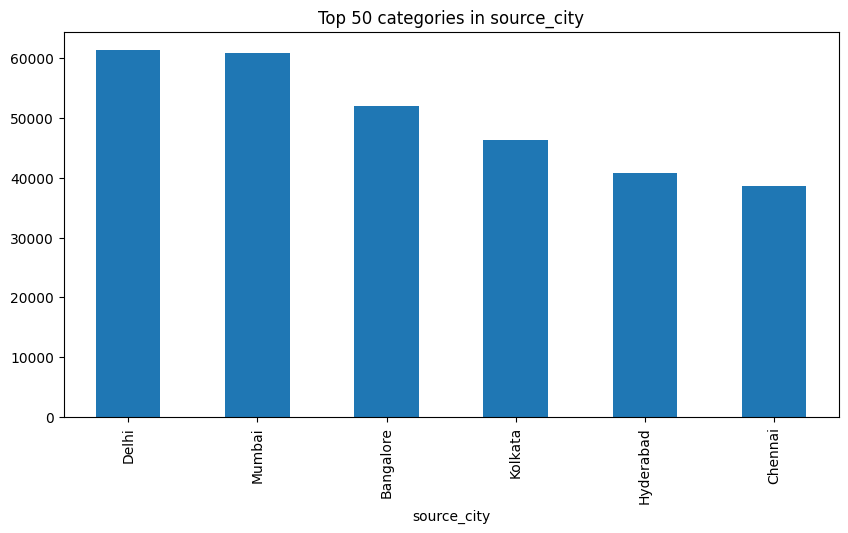

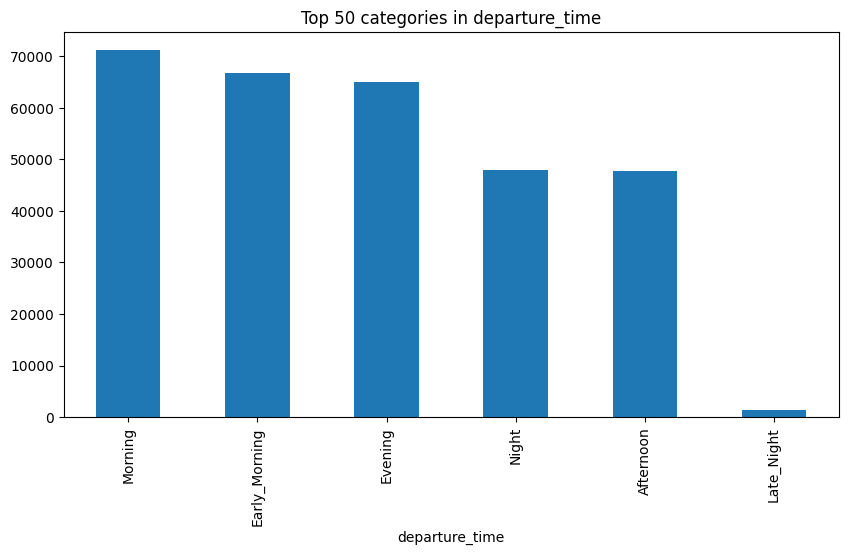

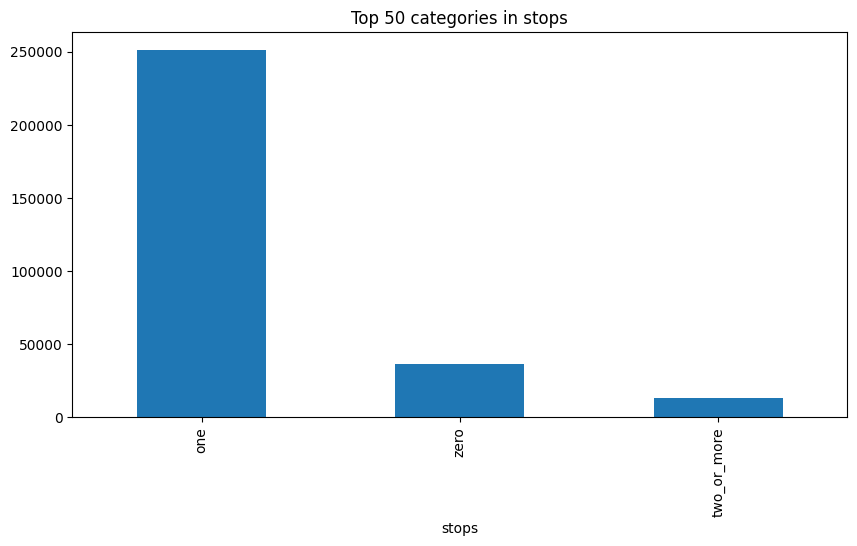

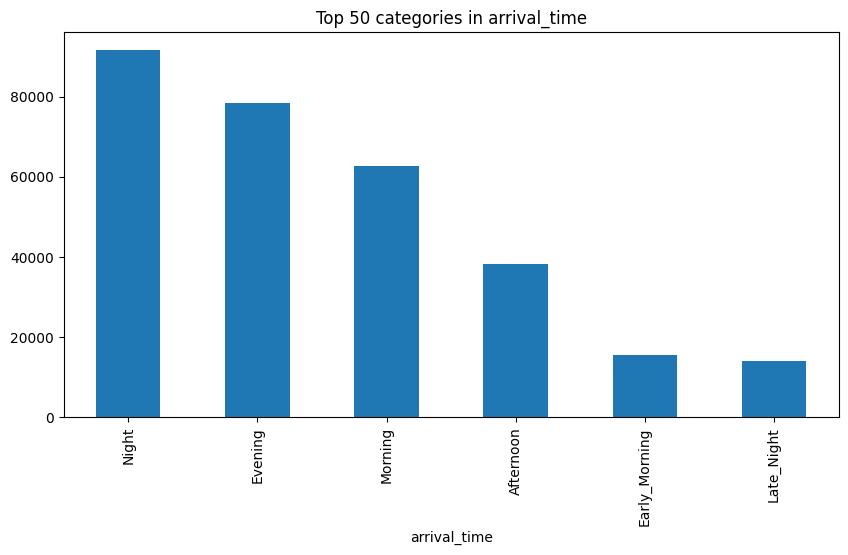

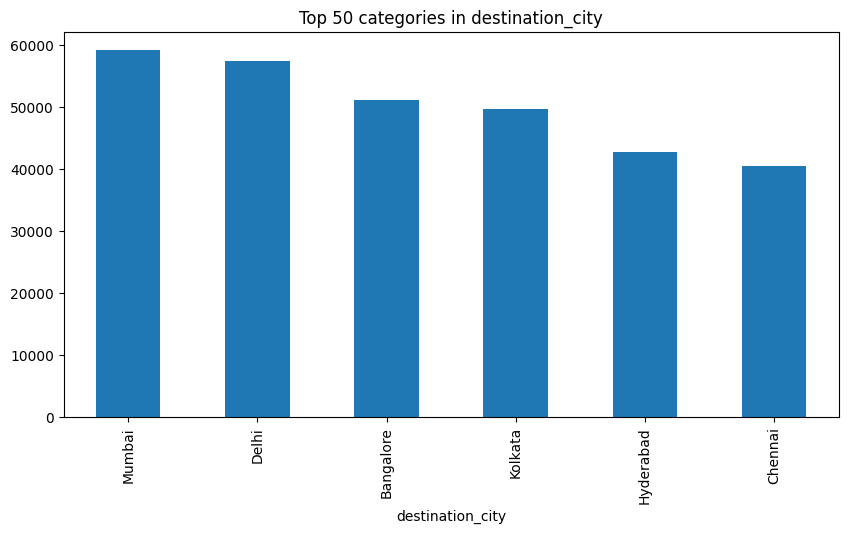

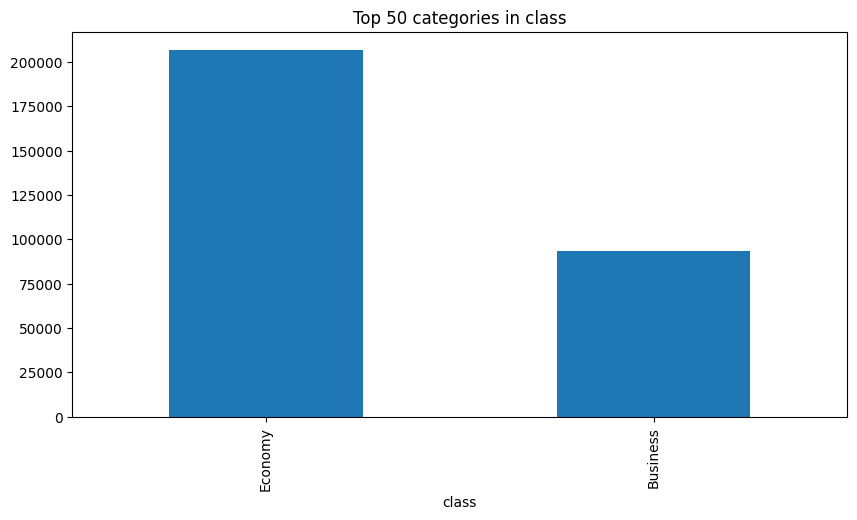

In [17]:
def Freq_analysis(df:pd.DataFrame,cat_columns,top_n:int=50):
    for col in cat_columns:
        freq=df[col].value_counts().nlargest(top_n)

        #Plot
        plt.figure(figsize=(10,5))
        freq.plot(kind="bar")
        plt.title(f"Top {top_n} categories in {col}")
        plt.xticks(rotation=90)
        plt.show()
cat_cols=data.select_dtypes(include=["object"]).columns
Freq_analysis(data,cat_cols)

In [18]:
def groupby_categorical_columns(df, column_name):
    return (
        df.groupby(column_name)['price']
        .agg(['mean', 'median', 'count', 'min', 'max'])
        .reset_index()  # ✅ fixed typo
        .sort_values(by='mean', ascending=False)
        .head(50)
    )

for col in data.select_dtypes(include='O'):
    print(groupby_categorical_columns(data, col))
    print('------------------------------------')


     airline          mean   median   count   min     max
5    Vistara  30396.536302  15543.0  127859  1714  123071
1  Air_India  23507.019112  11520.0   80892  1526   90970
4   SpiceJet   6179.278881   5654.0    9011  1106   34158
2   GO_FIRST   5652.007595   5336.0   23173  1105   32803
3     Indigo   5324.216303   4453.0   43120  1105   31952
0    AirAsia   4091.072742   3276.0   16098  1105   31917
------------------------------------
      flight          mean   median  count    min     max
718   AI-433  44025.000000  44025.0      3  44025   44025
1475  UK-820  40522.342664  56588.0   1036   4502   98919
1535  UK-930  39953.565074  60365.0   1214   3024  100909
1554  UK-985  39568.600798  59537.0   1002   2700   90057
1550  UK-970  39421.341424  60365.0   1236   2339   99403
1461  UK-802  38917.291429  56588.0   1050   4502  105168
1473  UK-818  38862.466899  56588.0   1148   4502   95374
1537  UK-940  38785.804237  44652.0   1369   2339   99403
1560  UK-996  38622.834913  48964.0

C:\Users\Eng^ M.Alaa^\AppData\Local\Temp\ipykernel_3140\560805725.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Eng^ M.Alaa^\AppData\Local\Temp\ipykernel_3140\560805725.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Eng^ M.Alaa^\AppData\Local\Temp\ipykernel_3140\560805725.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Eng^ M.Alaa^\AppData\Local\Temp\ipykernel_3140\560805725.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

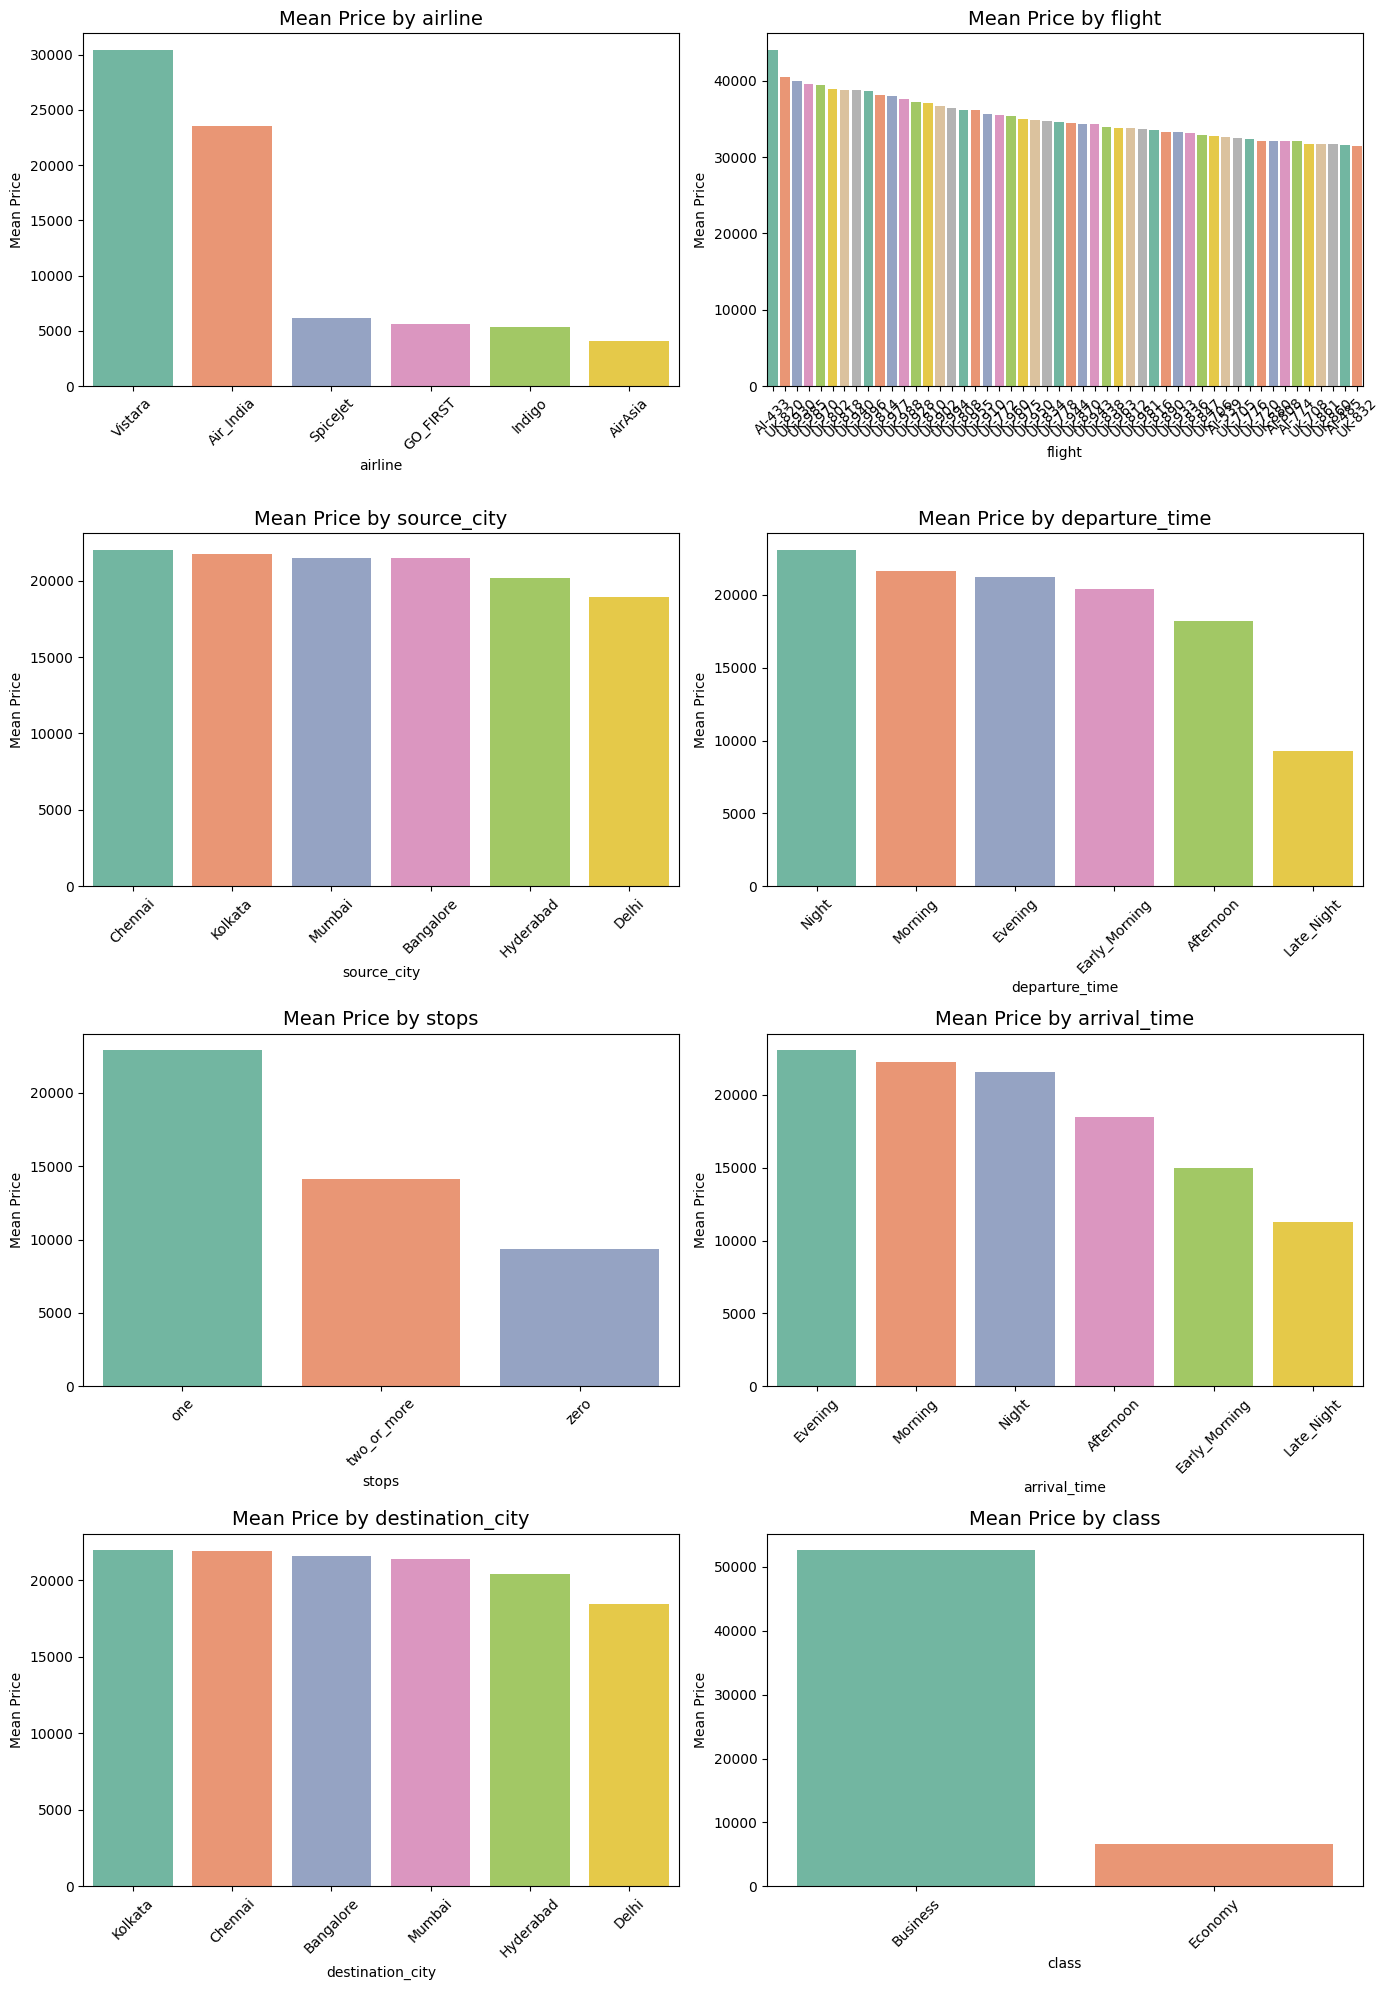

In [19]:

import math

def group_categorical_columns_median(df, column_name):
    return (
        df.groupby(column_name)['price']
        .mean()
        .sort_values(ascending=False).head(50)
    )

# Get categorical columns
categorical_cols = data.select_dtypes(include='O').columns

# Determine subplot grid size
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # Make it easy to index

# Plot each categorical column
for idx, col in enumerate(categorical_cols):
    median_prices = group_categorical_columns_median(data, col)
    sns.barplot(
        x=median_prices.index,
        y=median_prices.values,
        ax=axes[idx],
        palette="Set2"
    )
    axes[idx].set_title(f"Mean Price by {col}", fontsize=14)
    axes[idx].set_ylabel("Mean Price")
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


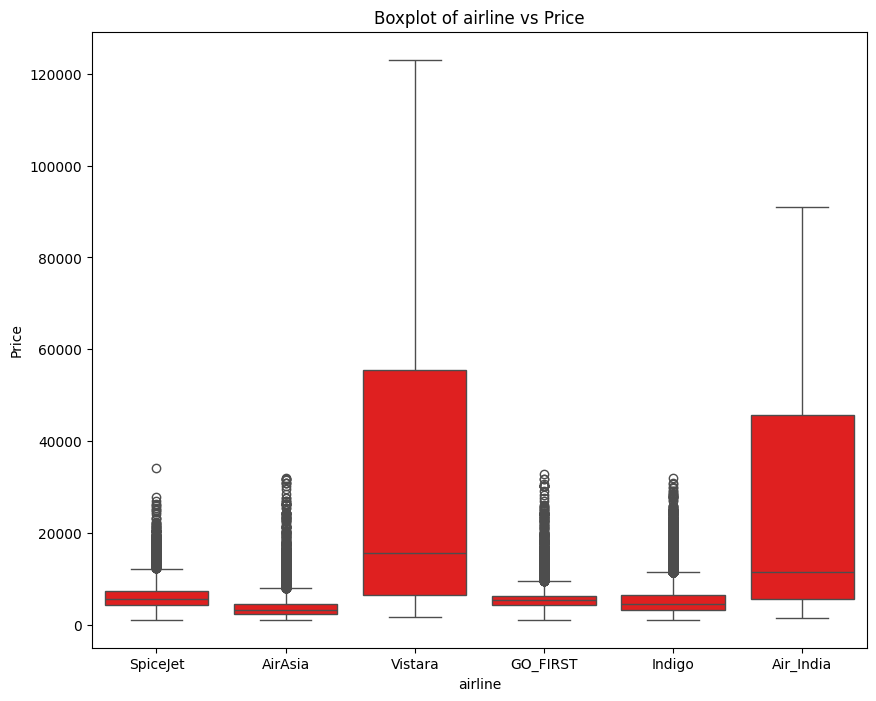

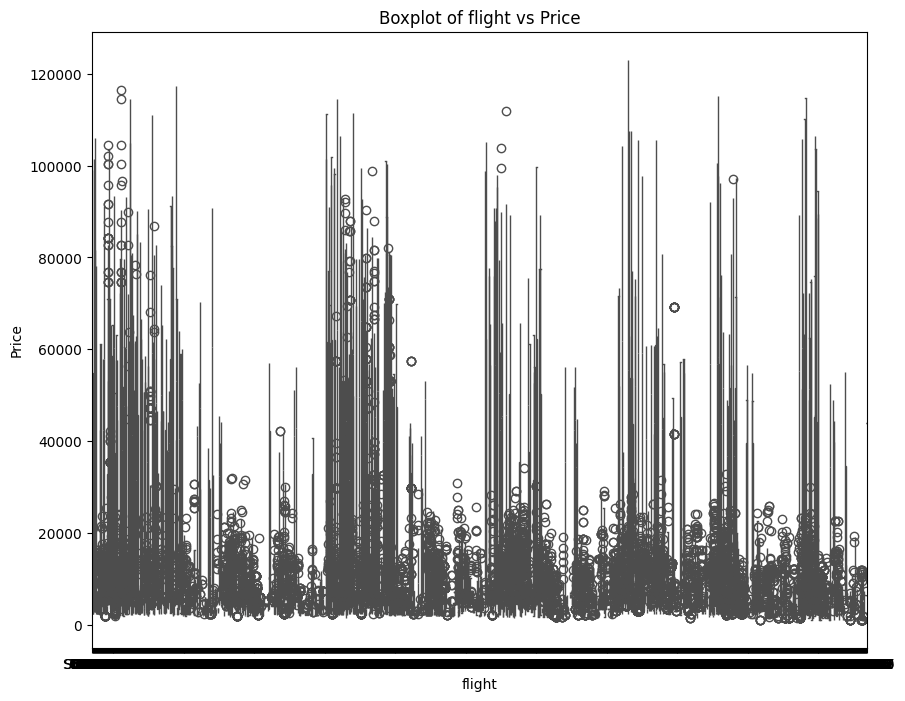

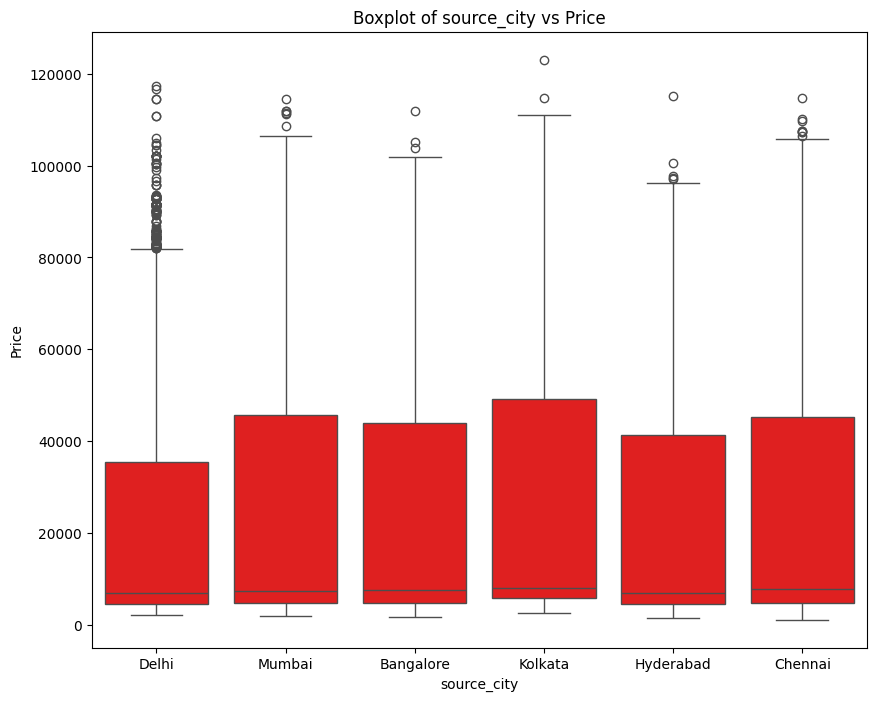

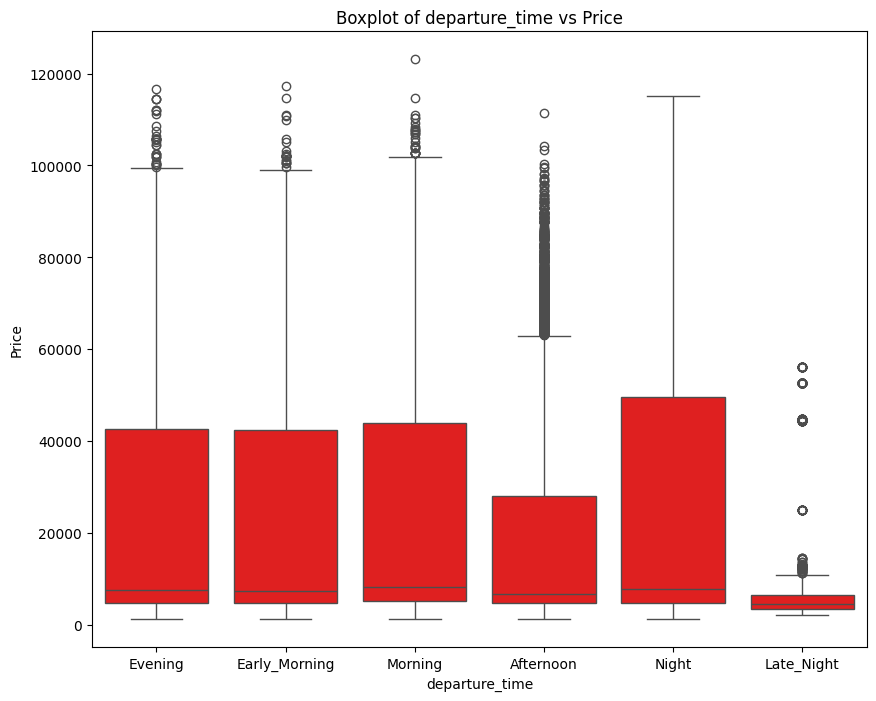

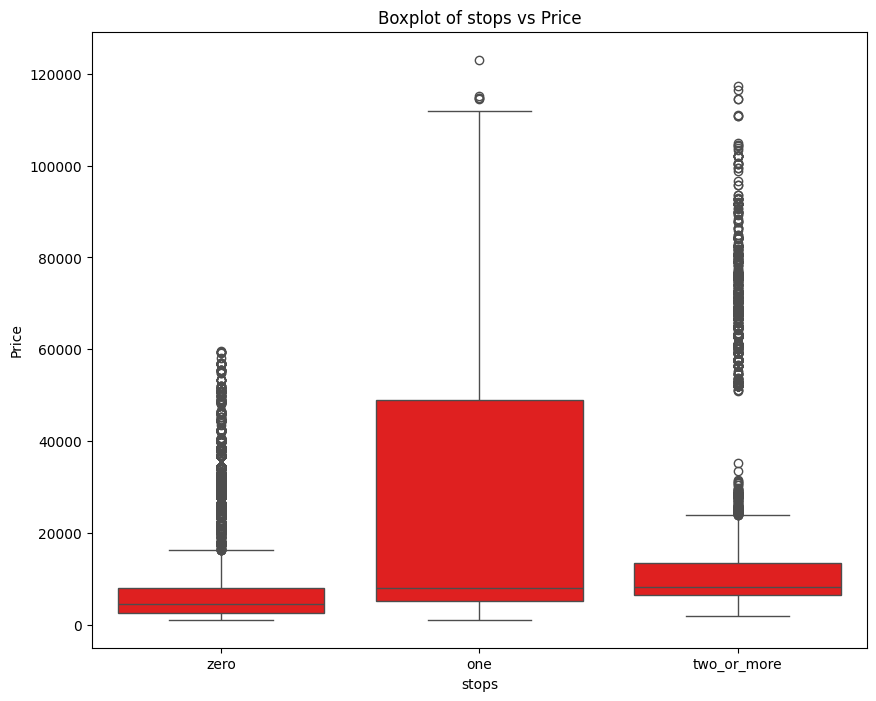

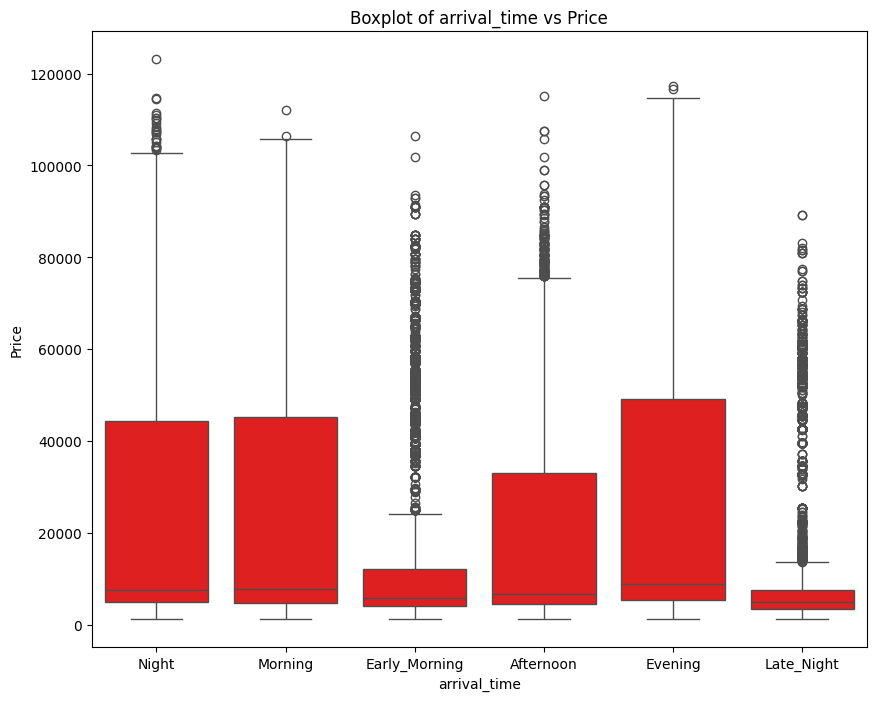

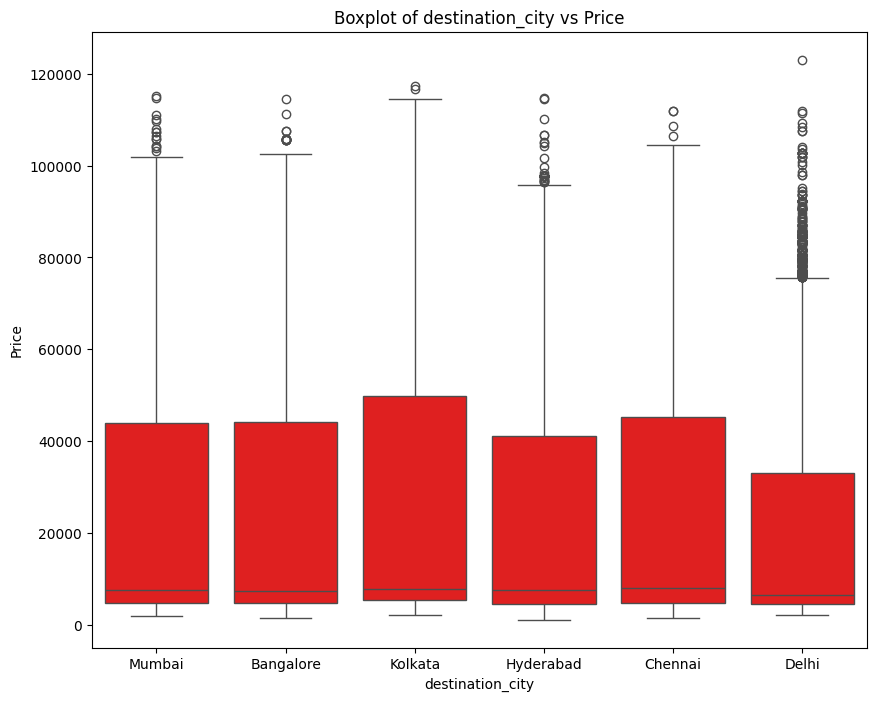

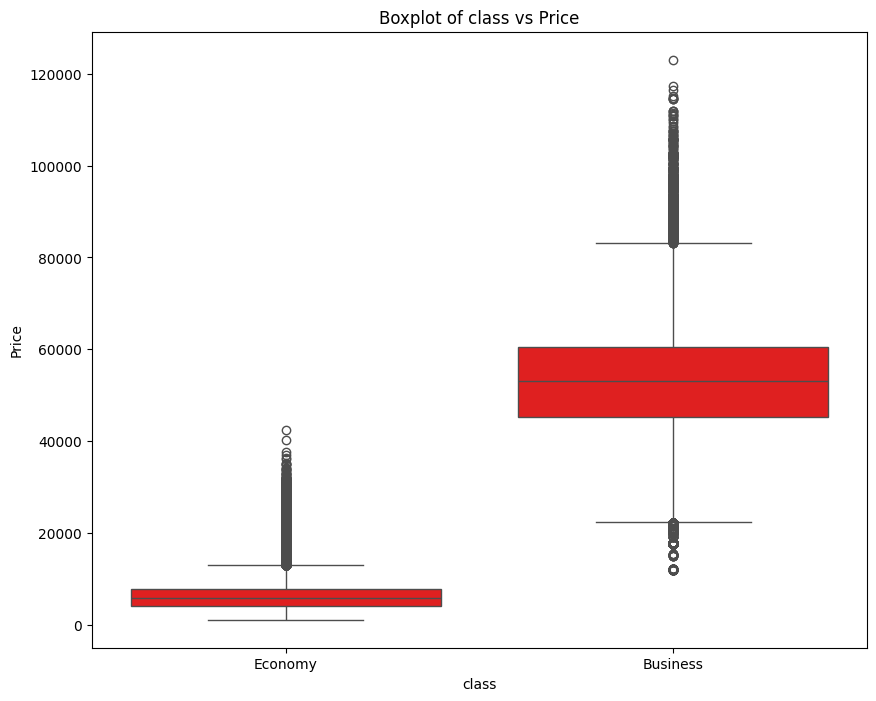

In [20]:
def boxplot_forcategorical(df,column_name):
  plt.figure(figsize=(10,8))
  sns.boxplot(data=df,x=column_name,y="price",color="red")
  plt.title(f"Boxplot of {column_name} vs Price")
  plt.xlabel(column_name)
  plt.ylabel("Price")
  plt.show()


for col in data.select_dtypes(include="object").columns:
  boxplot_forcategorical(data,col)

# Data Preprocessing

In [21]:
data['flight'] = data['flight'].str.split('-').str[0]
data.drop_duplicates()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [22]:
df['flight'] = df['flight'].str.split('-').str[0]
df.drop_duplicates()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [23]:
data['airline']=data['airline'].str.capitalize()
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,SG,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,Spicejet,SG,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,Airasia,I5,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [24]:
data['flight']=data['flight'].str.capitalize()
data['source_city']=data['source_city'].str.capitalize()
data['departure_time']=data['departure_time'].str.capitalize()
data['stops']=data['stops'].str.capitalize()
data['arrival_time']=data['arrival_time'].str.capitalize()
data['destination_city']=data['destination_city'].str.capitalize()
data['class']=data['class'].str.capitalize()
data.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,Sg,Delhi,Evening,Zero,Night,Mumbai,Economy,2.17,1,5953
1,Spicejet,Sg,Delhi,Early_morning,Zero,Morning,Mumbai,Economy,2.33,1,5953
2,Airasia,I5,Delhi,Early_morning,Zero,Early_morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Uk,Delhi,Morning,Zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Uk,Delhi,Morning,Zero,Morning,Mumbai,Economy,2.33,1,5955


In [25]:
df['airline']=df['airline'].str.capitalize()
df['flight']=df['flight'].str.capitalize()
df['source_city']=df['source_city'].str.capitalize()
df['departure_time']=df['departure_time'].str.capitalize()
df['stops']=df['stops'].str.capitalize()
df['arrival_time']=df['arrival_time'].str.capitalize()
df['destination_city']=df['destination_city'].str.capitalize()
df['class']=df['class'].str.capitalize()
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,Sg,Delhi,Evening,Zero,Night,Mumbai,Economy,2.17,1,5953
1,Spicejet,Sg,Delhi,Early_morning,Zero,Morning,Mumbai,Economy,2.33,1,5953
2,Airasia,I5,Delhi,Early_morning,Zero,Early_morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Uk,Delhi,Morning,Zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Uk,Delhi,Morning,Zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
def clip_outlier(df,column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)
  return df

for col in ['duration','days_left']:
  data=clip_outlier(data,col)
  df=clip_outlier(df,col)
  

In [27]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
def scale_columns(df, columns):
    # Create one scaler for all selected columns
    scaler = MinMaxScaler()

    # Fit and transform the selected columns together
    df[columns] = scaler.fit_transform(df[columns])

    return df

# Example usage
cols_to_scale = ['duration', 'days_left']
data = scale_columns(data, cols_to_scale)

In [28]:
def label_encoding(df, columns):
    encoders = {}  # Store each encoder per column

    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le  # Save encoder for later use

    
    return df

# Example usage
cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city','class']
data = label_encoding(data, cat_cols)

In [29]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,6,2,2,2,5,5,1,0.045656,0.0,5953
1,4,6,2,1,2,4,5,1,0.051107,0.0,5953
2,1,5,2,1,2,1,5,1,0.045656,0.0,5956
3,5,7,2,4,2,0,5,1,0.048382,0.0,5955
4,5,7,2,4,2,4,5,1,0.051107,0.0,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,7,1,4,0,2,3,0,0.315162,1.0,69265
300149,5,7,1,0,0,5,3,0,0.326746,1.0,77105
300150,5,7,1,1,0,5,3,0,0.442930,1.0,79099
300151,5,7,1,1,0,2,3,0,0.312436,1.0,81585


<Axes: >

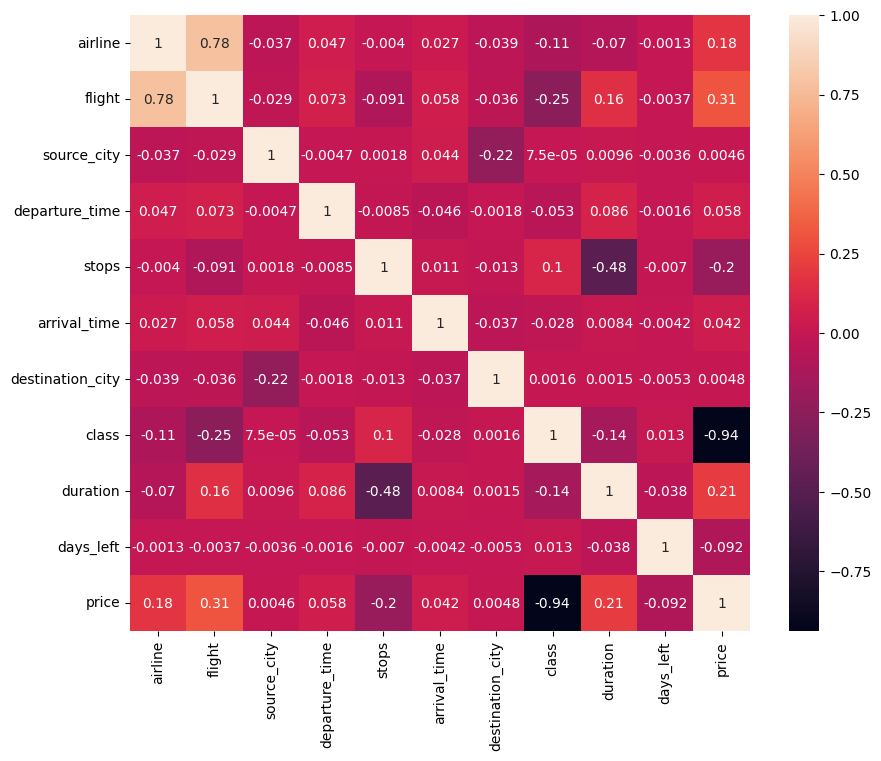

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,)

# Modeling and Evaluation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [31]:
x=data.drop(['price'],axis=1)
y=data['price']
y_log=np.log10(data['price'])


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [33]:
from sklearn.feature_selection import SequentialFeatureSelector


model = LinearRegression()

n_feats = min(10, x_train.shape[1] - 1)  # one less than total features
sfs = SequentialFeatureSelector(
    estimator=model,
    n_features_to_select=n_feats,
    direction='forward',
    scoring='r2',
    cv=5
)
sfs.fit(x_train, y_train)


# Get selected feature names
selected_features = x.columns[sfs.get_support()]
print("Selected features:", selected_features)

x_new=data[selected_features]


Selected features: Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')


In [34]:
df.drop(columns='departure_time',inplace=True)

In [35]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y,test_size=0.2,random_state=42)
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(x_new,y_log,test_size=0.2,random_state=42)

In [36]:
# build a class have three function to make modeling for many modeles in easy way
class modelling:
    def __init__(self, model, x_test, y_test, x_train, y_train,model_name):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test
        self.x_train = x_train
        self.y_train = y_train
        self.model_name=model_name

    def models_evaluation(self):
        self.model.fit(self.x_train, self.y_train)
        y_pred = self.model.predict(self.x_test)

        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, y_pred)

        train_score = self.model.score(self.x_train, self.y_train)
        test_score = self.model.score(self.x_test, self.y_test)

        self.evaluation_results = {
            'Train Score': train_score,
            'Test Score': test_score,
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'R-squared': r2
        }

        return self.evaluation_results

    def make_dataframe(self):
        if not hasattr(self, 'evaluation_results'):
            raise ValueError("You must run models_evaluation() before calling make_dataframe()")

        df = pd.DataFrame([self.evaluation_results])
        return df
    
    def make_plot_model(self):
        y_pred = self.model.predict(self.x_test)
        plt.figure(figsize=(7, 5))
        plt.scatter(self.y_test, y_pred, alpha=0.5, color='royalblue')
        plt.plot([self.y_test.min(), self.y_test.max()],
                 [self.y_test.min(), self.y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Rent')
        plt.ylabel('Predicted Rent')
        plt.title(f'Actual vs Predicted Rent: {self.model_name}')
        plt.show()


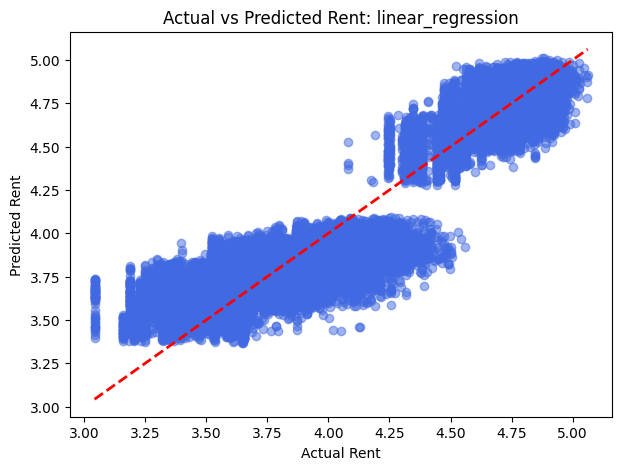

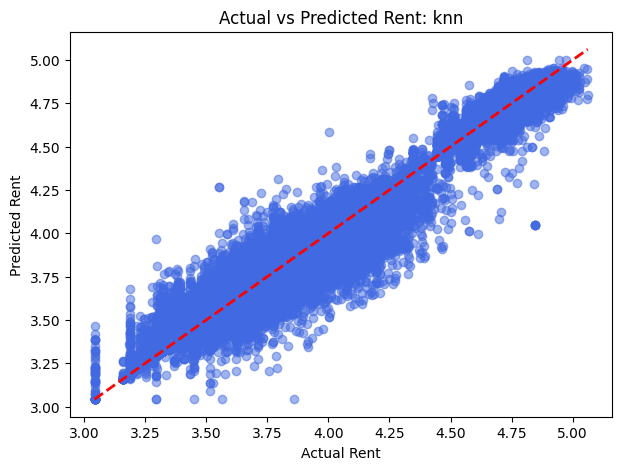

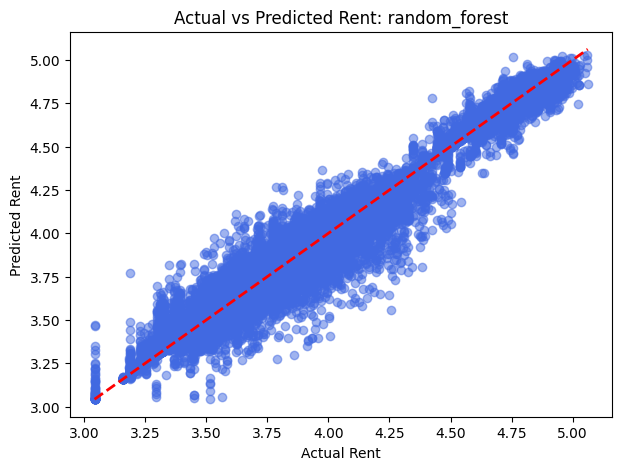

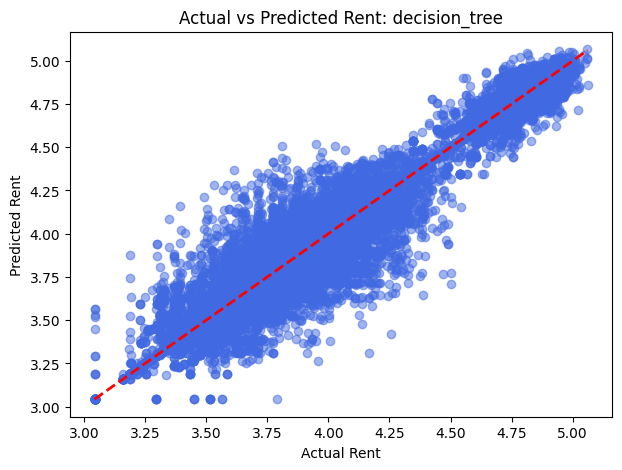

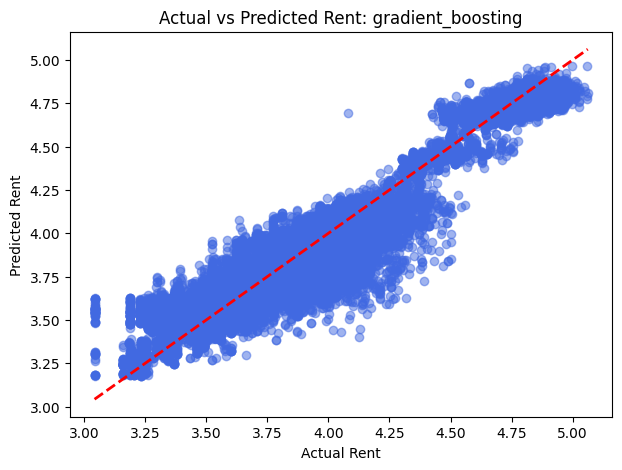

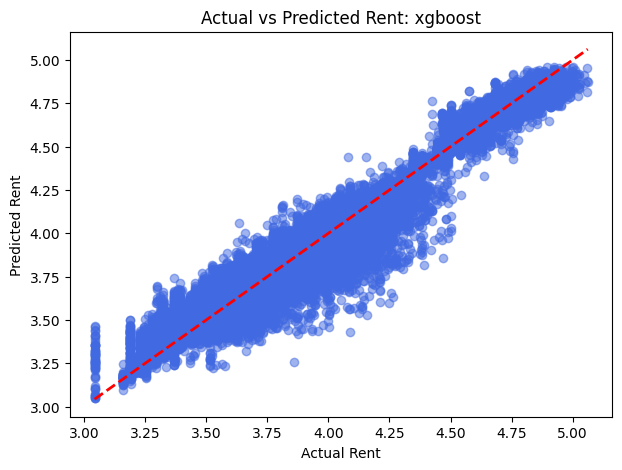

In [37]:
models={'linear_regression':LinearRegression(),
        'knn':KNeighborsRegressor(n_neighbors=5),
         'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
         'decision_tree': DecisionTreeRegressor(random_state=42),
         'gradient_boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
         'xgboost': XGBRegressor(n_estimators=100, random_state=42),
          } 

models_results={}
for model_name,model in models.items():
    model=modelling(model, x_test_log, y_test_log, x_train_log, y_train_log ,model_name)
    models_results[model_name]=model.models_evaluation()
    model.make_plot_model()


In [38]:
models=pd.DataFrame(models_results)
models

,linear_regression,knn,random_forest,decision_tree,gradient_boosting,xgboost
Train Score,0.890699,0.983638,0.997743,0.999633,0.950605,0.972850
Test Score,0.891199,0.973710,0.985686,0.976589,0.951316,0.972390
Mean Absolute Error,0.124832,0.046418,0.028194,0.029847,0.079222,0.056521
Mean Squared Error,0.025421,0.006143,0.003344,0.005470,0.011375,0.006451
Root Mean Squared Error,0.159441,0.078376,0.057831,0.073960,0.106654,0.080318
R-squared,0.891199,0.973710,0.985686,0.976589,0.951316,0.972390


In [39]:
from sklearn.ensemble import RandomForestRegressor
# Voting Regressor
rand = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit on selected features
rand.fit(x_train_new, y_train_new)

# Evaluate
y_pred = rand.predict(x_test_new)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_new, y_pred)
mse = mean_squared_error(y_test_new, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_new, y_pred)

print("Voting Regressor Results:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(rand.score(x_train_new,y_train_new))
print(rand.score(x_test_new,y_test_new))

Voting Regressor Results:
MAE: 1093.8695
MSE: 7795161.5257
RMSE: 2791.9816
R²: 0.9849
0.9974911353627532
0.9848779251480828


In [40]:
from sklearn.ensemble import VotingRegressor

# Example base models
model4=XGBRegressor()
model1=GradientBoostingRegressor(n_estimators=100, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = DecisionTreeRegressor( random_state=42)

# Voting Regressor
voting_reg = VotingRegressor(
    estimators=[
        ('lr', model1),
        ('rf', model2),
        ('gb', model3),
        ('xg',model4)
    ]
)

# Fit on selected features
voting_reg.fit(x_train_new, y_train_new)

# Evaluate
y_pred = voting_reg.predict(x_test_new)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_new, y_pred)
mse = mean_squared_error(y_test_new, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_new, y_pred)

print("Voting Regressor Results:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(voting_reg.score(x_train_new,y_train_new))
print(voting_reg.score(x_test_new,y_test_new))

Voting Regressor Results:
MAE: 1634.3863
MSE: 9559371.3332
RMSE: 3091.8233
R²: 0.9815
0.9906299349388454
0.9814554799974534


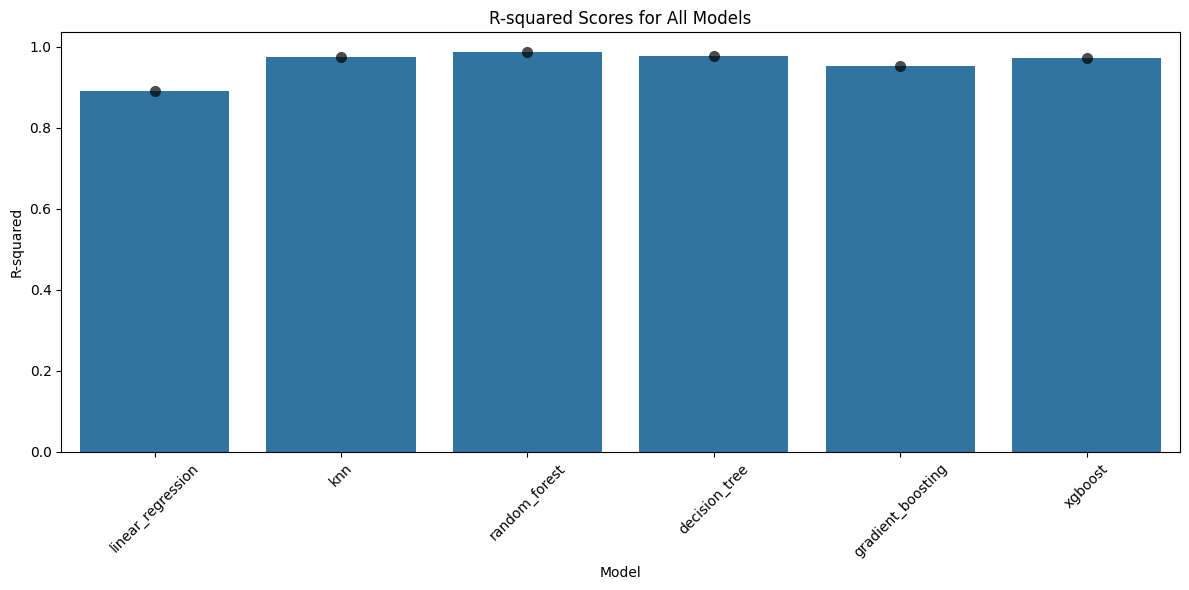

In [41]:

r2_series = models.loc['R-squared']

r2_df = r2_series.reset_index()
r2_df.columns = ['Model', 'R-squared']

# Now plot bar (though note, one value per model means no box but it's still possible)
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='R-squared', data=r2_df)

# Add stripplot to show points clearly
sns.stripplot(x='Model', y='R-squared', data=r2_df, color='black', size=8, jitter=True, alpha=0.7)

plt.title('R-squared Scores for All Models')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
x_test_new


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
27131,0,2,4,0,1,4,1,0.644634,0.812500
266857,5,4,4,0,5,5,0,0.306644,0.854167
141228,5,4,4,0,5,0,1,0.329472,0.833333
288329,5,1,5,0,4,2,0,0.465758,0.270833
97334,0,0,0,0,5,5,1,0.252811,0.395833
...,...,...,...,...,...,...,...,...,...
5234,0,2,1,0,2,5,1,0.400341,0.541667
5591,3,2,2,2,5,5,1,0.045656,0.583333
168314,0,3,1,0,5,0,1,0.434412,0.562500
175191,3,3,2,2,2,4,1,0.039864,0.812500


In [43]:
cols_to_scale

['duration', 'days_left']

In [44]:
cat_cols.remove('departure_time')

In [45]:
cat_cols

['airline',
 'flight',
 'source_city',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [46]:
df.head()

,airline,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price
0,Spicejet,Sg,Delhi,Zero,Night,Mumbai,Economy,2.17,1,5953
1,Spicejet,Sg,Delhi,Zero,Morning,Mumbai,Economy,2.33,1,5953
2,Airasia,I5,Delhi,Zero,Early_morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Uk,Delhi,Zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Uk,Delhi,Zero,Morning,Mumbai,Economy,2.33,1,5955


In [47]:
x_final=df.drop(['price'],axis=1)
y_final=df['price']


In [48]:
x_final.head(10)

,airline,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left
0,Spicejet,Sg,Delhi,Zero,Night,Mumbai,Economy,2.17,1
1,Spicejet,Sg,Delhi,Zero,Morning,Mumbai,Economy,2.33,1
2,Airasia,I5,Delhi,Zero,Early_morning,Mumbai,Economy,2.17,1
3,Vistara,Uk,Delhi,Zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Uk,Delhi,Zero,Morning,Mumbai,Economy,2.33,1
5,Vistara,Uk,Delhi,Zero,Afternoon,Mumbai,Economy,2.33,1
6,Vistara,Uk,Delhi,Zero,Morning,Mumbai,Economy,2.08,1
7,Vistara,Uk,Delhi,Zero,Evening,Mumbai,Economy,2.17,1
8,Go_first,G8,Delhi,Zero,Morning,Mumbai,Economy,2.17,1
9,Go_first,G8,Delhi,Zero,Evening,Mumbai,Economy,2.25,1


In [49]:
y_final.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [50]:
x_train_final,x_test_final,y_train_final,y_test_final=train_test_split(x_final,y_final,test_size=0.2,random_state=42)

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # Replaced LabelEncoder with OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), cols_to_scale),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)  # Use OneHotEncoder
    ]
)

# Example base models
model1 = XGBRegressor()
model11 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model12 = RandomForestRegressor(n_estimators=100, random_state=42)
model13 = DecisionTreeRegressor(random_state=42)

# Correctly initialize VotingRegressor with estimators
voting_reg_final = VotingRegressor(estimators=[
    ('xg', model1),
    ('gb', model11),
    ('rf', model12),
    ('dt', model13),
])

# Correct Pipeline definition
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', voting_reg_final)
])

# Fit the model
model.fit(x_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['airline', 'flight',
                                                   'source_city', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('regressor',
                 VotingRegressor(estimators=[('xg',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callb...
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...)),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42)),
                                             ('rf',
                                              RandomForestRegressor(random_state=42)),
                                             ('dt',
                                              DecisionTreeRegressor(random_state=42))]))])

In [52]:
score = model.score(x_test_final, y_test_final)
print(f"Test score: {score}")

Test score: 0.980422247489373


In [53]:
y_predict_final=model.predict(x_test_final)

In [55]:
r2_score(y_test_final,y_predict_final)


0.980422247489373

In [56]:
joblib.dump(model, "model.pkl")


['model.pkl']

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # Replaced LabelEncoder with OneHotEncoder

# Voting Regressor
rand = RandomForestRegressor(n_estimators=100, random_state=42)
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), cols_to_scale),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)  # Use OneHotEncoder
    ]
)
# Correct Pipeline definition
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', rand)
])


model1.fit(x_train_final, y_train_final)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['airline', 'flight',
                                                   'source_city', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [58]:
score1 = model1.score(x_test_final, y_test_final)
print(f"Test score: {score1}")

Test score: 0.9834902996947319


In [59]:
y_predict_final1=model1.predict(x_test_final)


In [60]:
r2_score(y_test_final,y_predict_final1)


0.9834902996947319

In [61]:
joblib.dump(model, "model1.pkl")


['model1.pkl']